<a href="https://colab.research.google.com/github/glyzinieh/find-PI/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

%cd /content
!git clone https://github.com/glyzinieh/find-PI.git
%cd find-PI

!pip install gmpy2 matplotlib-fontja mpmath tqdm

/content
fatal: destination path 'find-PI' already exists and is not an empty directory.
/content/find-PI


In [ ]:
from FindPI import conditions
from FindPI.evaluate import Comparer

DIGITS = 5
THRESHOLD = 1e-6
TIMES = 10

CONDITION = conditions.Distance(threshold=THRESHOLD)
# CONDITION = conditions.Digits(digits=DIGITS)
# CONDITION = conditions.Times(times=TIMES)

findPI = Comparer(CONDITION)

In [ ]:
import math
import random

from mpmath import factorial, mp, mpf, sqrt

from FindPI.math_funcs import cos, sin, tan

mp.dps = 1000


@findPI.func("内接多角形", {"n": 3})
def incribed(n):
    value = mpf(n) / mpf(2) * sqrt(2 - 2 * cos(360 / n))
    n += 1
    return value, {"n": n}


@findPI.func("外接多角形", {"n": 3})
def outcribed(n):
    value = n * tan(180 / n)
    n += 1
    return value, {"n": n}


# @findPI.func("モンテカルロ法", {"n": 0, "in_circle": 0})
def montecarlo(n, in_circle):
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1:
        in_circle += 1
    n += 1
    value = 4 * mpf(in_circle) / mpf(n)
    return value, {"n": n, "in_circle": in_circle}


@findPI.func("ライプニッツ級数", {"n": 0, "s": 0})
def leibniz(n, s):
    s += mpf((-1) ** n) / mpf(2 * n + 1)
    value = s * 4
    n += 1
    return value, {"n": n, "s": s}


@findPI.func("チュドノフスキーの公式", {"n": 0, "s": 0})
def chudnovsky(n, s):
    A = mpf(545140134)
    B = mpf(13591409)
    C = mpf(640320)
    s += (mpf(-1)**n) * factorial(6 * n) * (A * n + B) / (factorial(3 * n) * (factorial(n) ** 3) * (C ** (3 * (n + 1 / 2))))
    value = 1 / (12 * s)
    n += 1
    return value, {"n": n, "s": s}


@findPI.func("区分求積法", {"n": 1})
def quadrature(n):
    s = 0
    dx = mpf(1) / mpf(n)
    x = mpf(1) / mpf(n) / mpf(2)
    for _ in range(n):
        y = sqrt(1 - x**2)
        s += dx * y
        x += dx
    value = s * 4
    n += 1
    return value, {"n": n}


@findPI.func("二分法", {"x_1": 0, "x_2": 3})
def dichotomy(x_1, x_2):
    wj = mpf(x_1 + x_2) / 2
    if math.tan(wj) < 1:
        x_1 = wj
    else:
        x_2 = wj
    value = wj * 4
    return value, {"x_1": x_1, "x_2": x_2}

In [ ]:
findPI.run()
findPI.save("data/result")

100%|██████████| 6/6 [00:43<00:00,  7.18s/it]


In [15]:
from FindPI.evaluate import ResultContainer

results = [
    ResultContainer("内接多角形", path="data/result/内接多角形.pkl"),
    ResultContainer("外接多角形", path="data/result/外接多角形.pkl"),
    # ResultContainer("モンテカルロ法", path="data/result/モンテカルロ法.pkl"),
    # ResultContainer("ライプニッツ級数", path="data/result/ライプニッツ級数.pkl"),
    ResultContainer("チュドノフスキーの公式", path="data/result/チュドノフスキーの公式.pkl"),
    # ResultContainer("区分求積法", path="data/result/区分求積法.pkl"),
    ResultContainer("二分法", path="data/result/二分法.pkl"),
]

In [16]:
import mpmath

from FindPI.evaluate import Axis, HLine, PlotSettings, Plotter

mpmath.mp.dps = 1000

plot_settings = PlotSettings(
    x_axis=Axis("time", "time"),
    y_axis=Axis("digit", "digit"),
    # hline=HLine(mpmath.pi(), "π"),
    # marker=True
)

for result in results:
    result.set_target(mpmath.pi())

plotter = Plotter(
    plot_settings=plot_settings,
    results=results
)

4it [00:00, 26.48it/s]


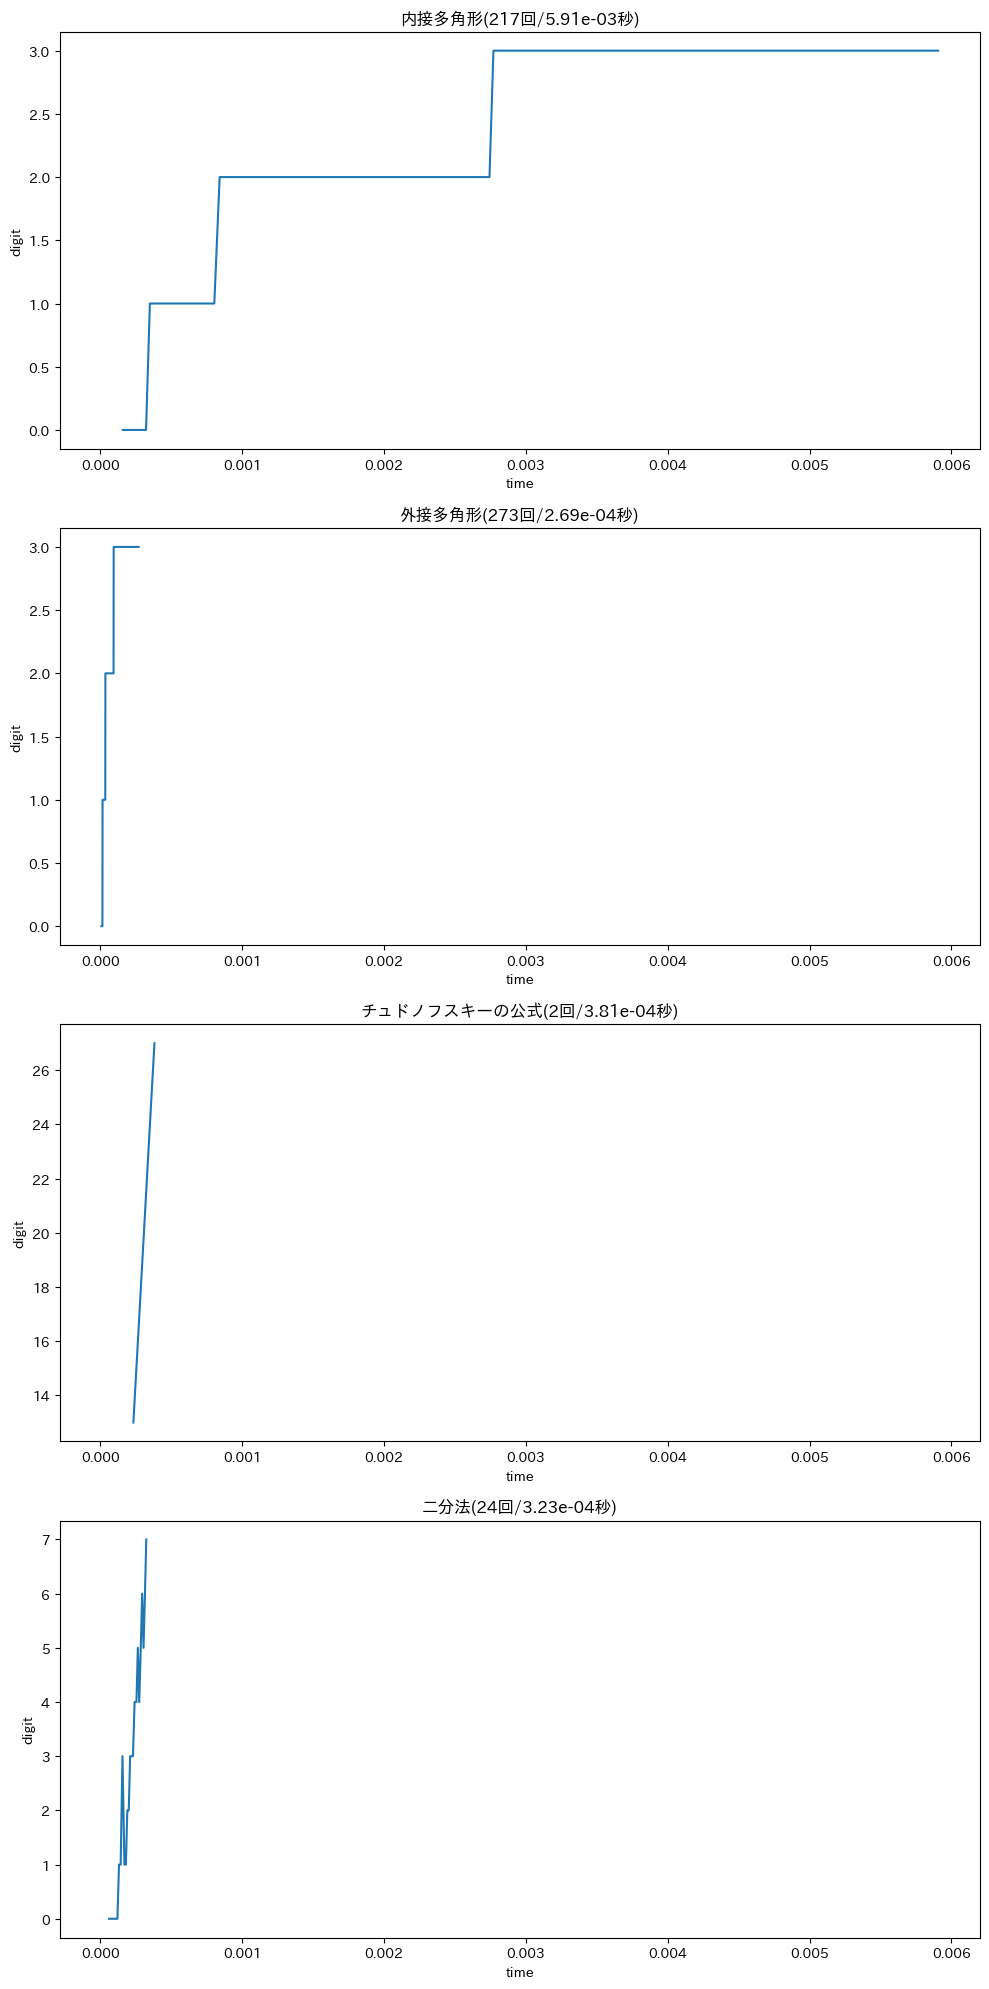

In [17]:
plotter.plot()

In [18]:
plotter.save("data/plot")